# <font color='brown'>Setup </font>

In [1]:
%%time
import os
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import lightgbm
from matplotlib import pyplot as plt
import seaborn as sns

Wall time: 5.1 s


In [2]:
def get_current_folder():
    return os.getcwd().split("\\")[-1]

In [3]:
current_path = os.getcwd()
raw_path = "{}\\{}\\{}".format(os.getcwd(), "webscrapping", "matches")
path = "{}\\{}".format(raw_path, "rounds")
filename = "na_merged.csv"
full_path = "{}\\{}".format(path, filename)
df = pd.read_csv(full_path)

In [4]:
df.head()

,RoundID,RoundNumber,RoundTime,ATK_wealth,DEF_wealth,ATK_alive,DEF_alive,DEF_has_OP,Def_has_Odin,RegularTime,...,DEF_duelists,DEF_sentinels,DEF_controllers,ATK_Shields,DEF_Shields,MapName,MatchID,SeriesID,bestOF,FinalWinner
0,172040,1,0,2000,2000,5,5,0,0,0,...,2,1,1,25,100,Ascent,10425,6113,3,0
1,172040,1,5973,1500,2000,4,5,0,0,6,...,2,1,1,25,100,Ascent,10425,6113,3,0
2,172040,1,20664,1000,2000,3,5,0,0,21,...,2,1,1,25,100,Ascent,10425,6113,3,0
3,172040,1,24676,1000,1500,3,4,0,0,25,...,1,1,1,25,75,Ascent,10425,6113,3,0
4,172040,1,26225,1000,1500,3,4,0,0,26,...,1,1,1,25,75,Ascent,10425,6113,3,0


In [5]:
"MatchID" in df
#a = df.query('MatchID == {}'.format(39944))
#df

True

In [6]:
df.columns

Index(['RoundID', 'RoundNumber', 'RoundTime', 'ATK_wealth', 'DEF_wealth',
       'ATK_alive', 'DEF_alive', 'DEF_has_OP', 'Def_has_Odin', 'RegularTime',
       'SpikeTime', 'ATK_bank', 'DEF_bank', 'ATK_initiators', 'ATK_duelists',
       'ATK_sentinels', 'ATK_controllers', 'DEF_initiators', 'DEF_duelists',
       'DEF_sentinels', 'DEF_controllers', 'ATK_Shields', 'DEF_Shields',
       'MapName', 'MatchID', 'SeriesID', 'bestOF', 'FinalWinner'],
      dtype='object')

In [7]:
df = df[["ATK_wealth", "DEF_wealth", "ATK_alive", "DEF_alive", "DEF_has_OP", "Def_has_Odin",
         "RegularTime", "SpikeTime", "MapName", "FinalWinner"]]
df = pd.get_dummies(df, columns=['MapName'])

In [8]:
X = df.drop(['FinalWinner'], axis='columns')
Y = df.FinalWinner
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=15)

In [9]:
%%time
params = pd.read_csv('model_params.csv', index_col=False)
params = params.to_dict('records')[0]
params

Wall time: 7.98 ms


{'bagging_freq': 2,
 'min_data_in_leaf': 90,
 'max_depth': 14,
 'learning_rate': 0.0985717197543476,
 'num_leaves': 70,
 'num_threads': 2,
 'min_sum_hessian_in_leaf': 2}

In [10]:
%%time
model = lightgbm.LGBMClassifier(bagging_freq=params["bagging_freq"], min_data_in_leaf=params["min_data_in_leaf"],
                                max_depth=params["max_depth"],
                                learning_rate=params["learning_rate"], num_leaves=params["num_leaves"],
                                num_threads=params["num_threads"], min_sum_hessian_in_leaf=params["min_sum_hessian_in_leaf"])
model.fit(X_train, Y_train)

[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Wall time: 2.23 s


LGBMClassifier(bagging_freq=2, learning_rate=0.0985717197543476, max_depth=14,
               min_data_in_leaf=90, min_sum_hessian_in_leaf=2, num_leaves=70,
               num_threads=2)

# <font color='brown'>Dataframe </font>

In [11]:
match = 39944
series = 18674

In [12]:
%%time
from webscrapping.wrapper.single_match_downloader import SingleMatchDownloader

smd = SingleMatchDownloader(match, series)
smd.download()

Match 39944 was already downloaded!
Wall time: 606 ms


In [13]:
df.head()

,ATK_wealth,DEF_wealth,ATK_alive,DEF_alive,DEF_has_OP,Def_has_Odin,RegularTime,SpikeTime,FinalWinner,MapName_Ascent,MapName_Bind,MapName_Breeze,MapName_Haven,MapName_Icebox,MapName_Split
0,2000,2000,5,5,0,0,0,0,0,1,0,0,0,0,0
1,1500,2000,4,5,0,0,6,0,0,1,0,0,0,0,0
2,1000,2000,3,5,0,0,21,0,0,1,0,0,0,0,0
3,1000,1500,3,4,0,0,25,0,0,1,0,0,0,0,0
4,1000,1500,3,4,0,0,26,0,0,1,0,0,0,0,0


In [15]:
from typing import List
from match_analysis import RoundReplay, generate_prediction_model, generate_round_replay_example

In [ ]:
df.head()

In [18]:
rr = generate_round_replay_example(match, series)

match → 39944 series → 18674
Match 39944 was already downloaded!
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


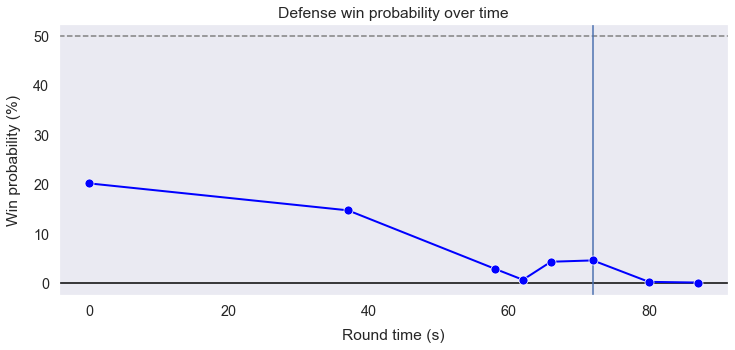

In [19]:
rr.plot_round(7, side="def")

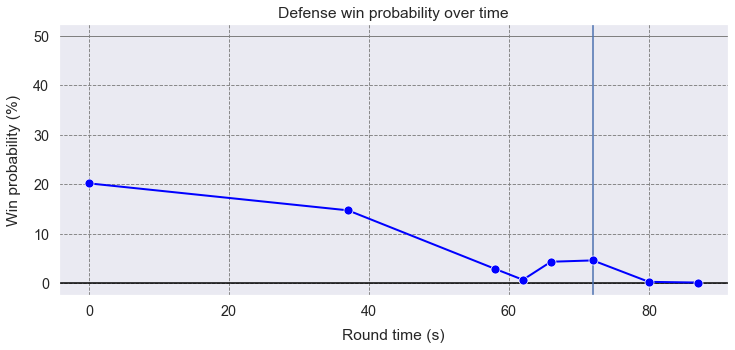

In [37]:
plt.figure(figsize=(12, 5))
round_number = 7
chosen_side = "def"
color_dict = {"atk": "red", "def": "blue"}
round_data = rr.get_round_probability(round_number, side=chosen_side)

sns.set_context(rc={'patch.linewidth': 2.0})
sns.set(font_scale=1.3)
ax = sns.lineplot(x="Round time", y="Attack_win_probability", data=round_data,
                          linewidth=2.0, zorder=3, color=color_dict[chosen_side])
ax.set(xlabel='Round time (s)', ylabel='Win probability (%)')
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 12
ax.grid(linewidth=.7, color='gray', zorder=0)
title_dict = {"atk": "Attack", "def": "Defense"}
plt.title("{} win probability over time".format(title_dict[chosen_side]))
ax.lines[0].set_marker("o")
ax.lines[0].set_markersize(9)
plt.axhline(y=0, color="black")
plt.axhline(y=50, linestyle="-", color="grey", linewidth=1.5)
plt.grid(True, which='both', linestyle='--', zorder=0, linewidth=0.9)

        # plot a grid

plant = rr.get_plant_stamp(round_number)
if plant is not None:
    plt.axvline(x=plant)

In [20]:
rr.get_round_probability(7, side="def")

,Round time,Attack_win_probability
327429,0,20.15
327430,37,14.69
327431,58,2.86
327432,62,0.64
327433,66,4.29
327434,72,4.56
327435,80,0.22
327436,87,0.08


In [21]:
rr.get_round_dataframe(7)

,RoundID,RoundNumber,RoundTime,ATK_wealth,DEF_wealth,ATK_alive,DEF_alive,DEF_has_OP,Def_has_Odin,RegularTime,...,DEF_duelists,DEF_sentinels,DEF_controllers,ATK_Shields,DEF_Shields,MapName,MatchID,SeriesID,bestOF,FinalWinner
327429,640246,7,0,14500,5200,5,5,0,0,0,...,2,1,1,250,125,Haven,39944,18674,3,1
327430,640246,7,37110,14500,5200,5,4,0,0,37,...,1,1,1,250,75,Haven,39944,18674,3,1
327431,640246,7,58165,14500,3600,5,3,0,0,58,...,1,0,1,250,50,Haven,39944,18674,3,1
327432,640246,7,62380,14500,2600,5,2,0,0,62,...,1,0,0,250,50,Haven,39944,18674,3,1
327433,640246,7,66217,11600,2600,4,2,0,0,66,...,1,0,0,200,50,Haven,39944,18674,3,1
327434,640246,7,71627,11600,2600,4,2,0,0,72,...,1,0,0,200,50,Haven,39944,18674,3,1
327435,640246,7,80159,11600,1000,4,1,0,0,0,...,0,0,0,200,25,Haven,39944,18674,3,1
327436,640246,7,86549,11600,0,4,0,0,0,0,...,0,0,0,200,0,Haven,39944,18674,3,1


In [35]:
r_number = pd.Series(rr.get_round_table().keys())
r_atk = pd.Series(rr.get_atk_scores())
r_def = pd.Series(rr.get_def_scores())
r_winner = pd.Series([rr.get_match_winner()] * len(r_number))
r_ids = pd.Series([rr.match_id] * len(r_number))

frame = {'MatchID': r_ids, 'RoundNumber': r_number, 'AtkScore': r_atk, 'DefScore': r_def, 'FinalWinner': r_winner}

match_frame = pd.DataFrame(frame)

AttributeError: 'RoundReplay' object has no attribute 'get_atk_scores'

In [ ]:
match_frame

https://runitback.gg/series/12745?match=25645&round=19&tab=replay

# Match

In [ ]:
match = 26508
path2 = 'D:\\Documents\\GitHub\\Classification_datascience\\webscrapping\\matches\\rounds\\combined_csv.csv'
data = pd.read_csv('{}'.format(path2))

In [ ]:
class MatchReplay:
    def __init__(self, match_id: int, input_df: pd.DataFrame):
        self.df: pd.DataFrame = input_df
        self.match_id: int = match_id
        self.query: pd.DataFrame = input_df.query('MatchID == {}'.format(match_id))

    def get_round_table(self) -> dict:
        g = self.query[["RoundNumber", "RoundID"]]
        g.drop_duplicates()
        return dict(zip(g.RoundNumber, g.RoundID))

    def get_atk_scores(self) -> List[int]:
        dfm = list(self.get_round_winners().values())
        score_dict = {'atk': 0, 'def': 0}
        atk_scores = []

        for i in dfm[:12]:
            if i == 1:
                score_dict['atk'] += 1
            atk_scores.append(score_dict['atk'])
        for j in dfm[12:24]:
            if j == 0:
                score_dict['atk'] += 1
            atk_scores.append(score_dict['atk'])

        return atk_scores

    def get_round_winners(self) -> dict:
        g = self.query[["RoundNumber", "FinalWinner"]]
        g.drop_duplicates()
        return dict(zip(g.RoundNumber, g.FinalWinner))

    def get_def_scores(self) -> List[int]:
        dfm = list(self.get_round_winners().values())
        score_dict = {'atk': 0, 'def': 0}
        def_scores = []

        for i in dfm[:12]:
            if i == 0:
                score_dict['def'] += 1
            def_scores.append(score_dict['def'])
        for j in dfm[12:24]:
            if j == 1:
                score_dict['def'] += 1
            def_scores.append(score_dict['def'])

        return def_scores

    def get_match_winner(self) -> int:
        atks = self.get_atk_scores()
        defs = self.get_def_scores()

        winner = 0
        if atks[-1] == 12 and defs[-1] == 12:
            winner = 2
        elif atks[-1] == 13:
            winner = 1
        elif defs[-1] == 13:
            winner = 0
        return winner

    def generate_match_dataframe(self) -> pd.DataFrame:
        r_number = pd.Series(self.get_round_table().keys())
        r_atk = pd.Series(self.get_atk_scores())
        r_def = pd.Series(self.get_def_scores())
        r_winner = pd.Series([self.get_match_winner()] * len(r_number))
        r_ids = pd.Series([self.match_id] * len(r_number))

        frame = {'MatchID': r_ids, 'RoundNumber': r_number, 'AtkScore': r_atk, 'DefScore': r_def,
                 'FinalWinner': r_winner}

        d_frame = pd.DataFrame(frame)
        d_frame.dropna()

        return d_frame

    def get_all_matches(self) -> set:
        return set(self.df.MatchID)
    
    def get_atk_bank(self):
        return [
            max(self.query.query('RoundNumber == {}'.format(r)).ATK_bank)
            for r in self.get_round_table().keys()
        ]

    def get_big_dataframe(self):
        df_list = []
        match_indexes = list(self.get_all_matches())

        for i in match_indexes:
            self.match_id = i
            self.query: pd.DataFrame = self.df.query('MatchID == {}'.format(i))
            df_list.append(self.generate_match_dataframe())

        merged = pd.concat(df_list)
        merged.dropna(inplace=True)
        merged["AtkScore"] = merged["AtkScore"].astype(int)
        merged["DefScore"] = merged["DefScore"].astype(int)

        return merged

    def export_big_dataframe(self):
        big_df = self.get_big_dataframe()
        big_df.to_csv(r'matches\rounds\matches_csv.csv', index=False)
        
mr = MatchReplay(match, data)

In [ ]:
%%time
qq = mr.get_big_dataframe()
qq

In [ ]:
mr.get_atk_bank()

In [ ]:
mr.generate_match_dataframe()